In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [135]:
df.shape

(244, 7)

C:\Users\Sikandar\AppData\Local\Temp\ipykernel_1692\1421911433.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bill'])


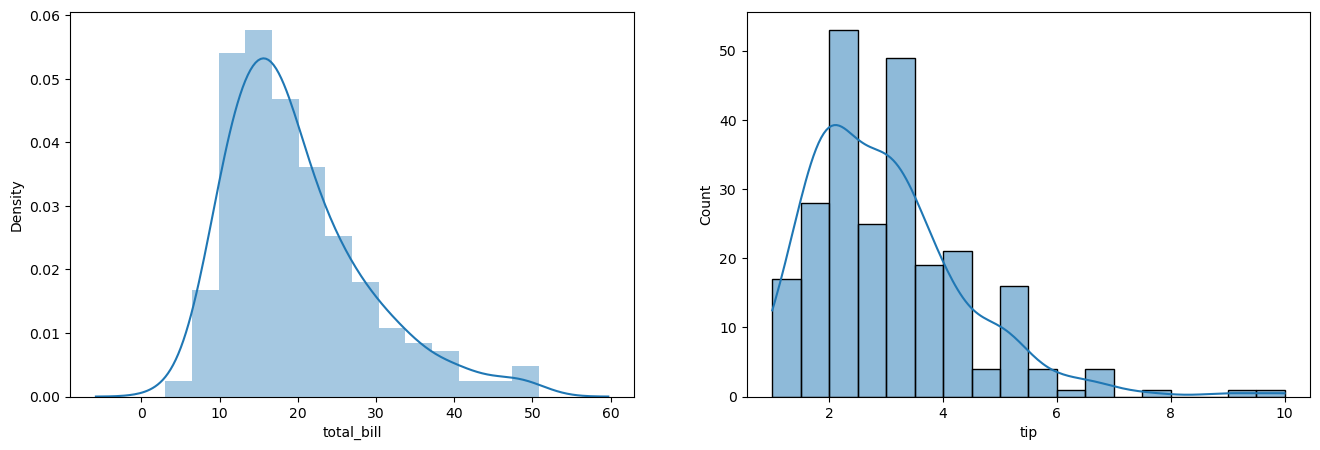

In [137]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(df['total_bill'])

plt.subplot(1,2,2)
sns.histplot(df['tip'], kde=True)

plt.show()



In [105]:
df['degree_p'].skew()

-0.24707470460171496

In [117]:
print("Mean value of degree_p",df['degree_p'].mean())
print("Std value of degree_p",df['degree_p'].std())
print("Min value of degree_p",df['degree_p'].min())
print("Max value of degree_p",df['degree_p'].max())

Mean value of degree_p 75.01833333333333
Std value of degree_p 8.881278951773165
Min value of degree_p 50.7
Max value of degree_p 90.3


<Axes: ylabel='degree_p'>

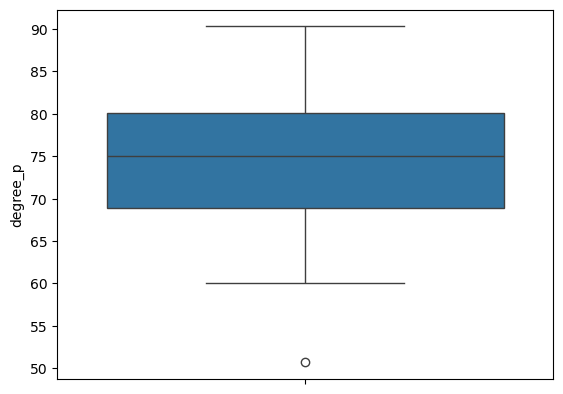

In [113]:
sns.boxplot(df['degree_p'])

In [119]:
print("highest allowed",df['degree_p'].mean()+3*df['degree_p'].std())
print("lowest allowed",df['degree_p'].mean()-3*df['degree_p'].std())

highest allowed 101.66217018865282
lowest allowed 48.37449647801384


In [123]:
df[(df['degree_p'] > 101.66) | (df['degree_p'] < 48.37 )] 

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_s,degree_p,workex,etest_p


**Z-score step as Trimming technique**

In [48]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11 )]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [52]:
# Approach 2 - new column for every student

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [54]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [56]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [58]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [60]:
# Trimming
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


**Z-score step as Capping treatment**

In [67]:
# same upper and lower limit geometric formula for the capping treatement
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
lower_limit,upper_limit

(5.113546374602832, 8.808933625397168)

In [69]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)
df.shape

(1000, 4)

In [71]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64